In [4]:
pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 487.6 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.9 kB 930.9 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 997.9 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 2.0 MB/s eta 0:00:04
    --------------------------------------- 0.2/8.0 MB 2.1 MB/s eta 0:00:04
   - -------------------------------------- 0.2/8.0 MB 2.1 MB/s eta 0:00:04
   - ------------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%load_ext autoreload

# Examen
## Gauss-Jacobi y Gauss-Seidel

In [7]:
%autoreload 2
from src import eliminacion_gaussiana, matriz_aumentada
A = [[1, 1], [-2, 5]]
b = [7, 0]
eliminacion_gaussiana(matriz_aumentada(A, b))

[07-19 22:20:01][INFO] 2024-07-19 22:20:01.998081
[07-19 22:20:02][INFO] 2024-07-19 22:20:02.000086
[07-19 22:20:02][INFO] 2024-07-19 22:20:02.002080
[07-19 22:20:02][INFO] 
[[ 1.  1.  7.]
 [ 0.  7. 14.]]


array([5., 2.])

In [8]:
%autoreload 2
from src import gauss_jacobi
A = [[1, 1], [-2, 5]]
b = [7, 0]
n = len(A)

gauss_jacobi(A=A, b=b, x0=[0]*n, tol=1e-5, max_iter=1000)


[07-19 22:20:04][INFO] i= 0 x: [0. 0.]
[07-19 22:20:04][INFO] i= 1 x: [[7. 0.]]
[07-19 22:20:04][INFO] i= 2 x: [[7.  2.8]]
[07-19 22:20:04][INFO] i= 3 x: [[4.2 2.8]]
[07-19 22:20:04][INFO] i= 4 x: [[4.2  1.68]]
[07-19 22:20:04][INFO] i= 5 x: [[5.32 1.68]]
[07-19 22:20:04][INFO] i= 6 x: [[5.32  2.128]]
[07-19 22:20:04][INFO] i= 7 x: [[4.872 2.128]]
[07-19 22:20:04][INFO] i= 8 x: [[4.872  1.9488]]
[07-19 22:20:04][INFO] i= 9 x: [[5.0512 1.9488]]
[07-19 22:20:04][INFO] i= 10 x: [[5.0512  2.02048]]
[07-19 22:20:04][INFO] i= 11 x: [[4.97952 2.02048]]
[07-19 22:20:04][INFO] i= 12 x: [[4.97952  1.991808]]
[07-19 22:20:04][INFO] i= 13 x: [[5.008192 1.991808]]
[07-19 22:20:04][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-19 22:20:04][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-19 22:20:04][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-19 22:20:04][INFO] i= 17 x: [[5.00131072 1.99868928]]
[07-19 22:20:04][INFO] i= 18 x: [[5.00131072 2.00052429]]
[07-19 22:20:04][INFO] i= 19 x: [[4.99947571 2.0005242

array([[5.00000537],
       [2.00000215]])


![alt text](assets/trayectoria.png)


## Grafique

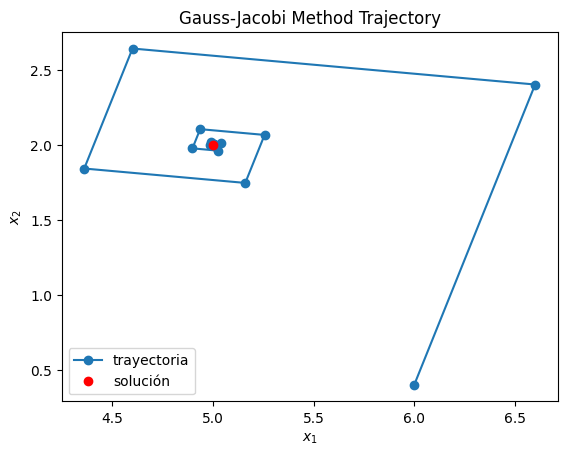

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi(A, b, x0, tol, max_iter):
    n = len(A)
    x = x0.copy()
    x_new = x0.copy()
    iterations = []
    
    for k in range(max_iter):
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if i != j)
            x_new[i] = (b[i] - s) / A[i][i]
        
        iterations.append(x_new.copy())
        if np.linalg.norm(np.array(x_new) - np.array(x)) < tol:
            break
        x = x_new.copy()
    
    return iterations

# Example usage:
A = [[1, 1], [-2, 5]]
b = [7, 0]
x0 = [1, 1]
tol = 1e-5
max_iter = 1000

iterations_jacobi = gauss_jacobi(A, b, x0, tol, max_iter)

# Plotting
x1_vals = [iter[0] for iter in iterations_jacobi]
x2_vals = [iter[1] for iter in iterations_jacobi]

plt.figure()
plt.plot(x1_vals, x2_vals, 'o-', label='trayectoria')
plt.plot(x1_vals[-1], x2_vals[-1], 'ro', label='solución')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Gauss-Jacobi Method Trajectory')
plt.show()


## Use otra estimación inicial
$ x_0 = (1, 1)$

# Grafique

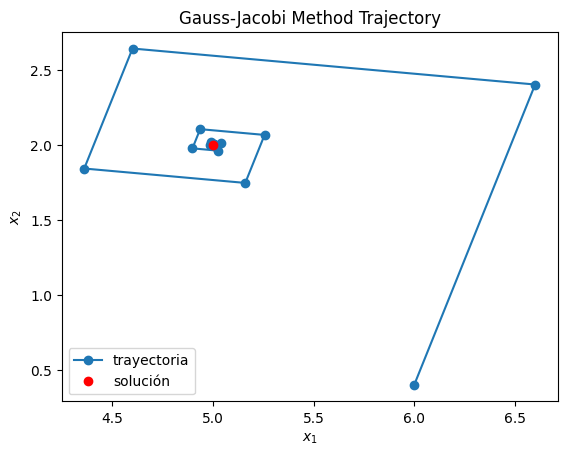

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi(A, b, x0, tol, max_iter):
    n = len(A)
    x = x0.copy()
    x_new = x0.copy()
    iterations = []
    
    for k in range(max_iter):
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if i != j)
            x_new[i] = (b[i] - s) / A[i][i]
        
        iterations.append(x_new.copy())
        if np.linalg.norm(np.array(x_new) - np.array(x)) < tol:
            break
        x = x_new.copy()
    
    return iterations

# System of equations
A = [[1, 1], [-2, 5]]
b = [7, 0]
x0 = [1, 1]
tol = 1e-5
max_iter = 1000

# Gauss-Jacobi
iterations_jacobi = gauss_jacobi(A, b, x0, tol, max_iter)
x1_vals = [iter[0] for iter in iterations_jacobi]
x2_vals = [iter[1] for iter in iterations_jacobi]

plt.figure()
plt.plot(x1_vals, x2_vals, 'o-', label='trayectoria')
plt.plot(x1_vals[-1], x2_vals[-1], 'ro', label='solución')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Gauss-Jacobi Method Trajectory')
plt.show()


## Gauss-Seidel

In [11]:
%autoreload 2
from src import gauss_seidel
# ---------- 
A = [[1, 1], [-2, 5]]
b = [7, 0]
n = len(b)
gauss_seidel(A=A, b=b, x0=[0]*n, tol=1e-5, max_iter=1000)


[07-19 22:21:59][INFO] i= 0 x: [0. 0.]
[07-19 22:21:59][INFO] i= 1 x: [[7.  2.8]]
[07-19 22:21:59][INFO] i= 2 x: [[4.2  1.68]]
[07-19 22:21:59][INFO] i= 3 x: [[5.32  2.128]]
[07-19 22:21:59][INFO] i= 4 x: [[4.872  1.9488]]
[07-19 22:21:59][INFO] i= 5 x: [[5.0512  2.02048]]
[07-19 22:21:59][INFO] i= 6 x: [[4.97952  1.991808]]
[07-19 22:21:59][INFO] i= 7 x: [[5.008192  2.0032768]]
[07-19 22:21:59][INFO] i= 8 x: [[4.9967232  1.99868928]]
[07-19 22:21:59][INFO] i= 9 x: [[5.00131072 2.00052429]]
[07-19 22:21:59][INFO] i= 10 x: [[4.99947571 1.99979028]]
[07-19 22:21:59][INFO] i= 11 x: [[5.00020972 2.00008389]]
[07-19 22:21:59][INFO] i= 12 x: [[4.99991611 1.99996645]]
[07-19 22:21:59][INFO] i= 13 x: [[5.00003355 2.00001342]]
[07-19 22:21:59][INFO] i= 14 x: [[4.99998658 1.99999463]]
[07-19 22:21:59][INFO] i= 15 x: [[5.00000537 2.00000215]]


array([[4.99999785],
       [1.99999914]])

## Grafique el método de Gauss-Seidel


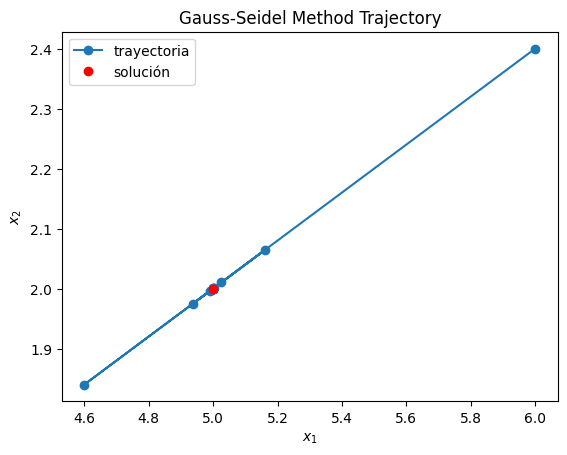

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(A)
    x = x0.copy()
    iterations = []
    
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s = sum(A[i][j] * x_new[j] for j in range(n) if i != j)
            x_new[i] = (b[i] - s) / A[i][i]
        
        iterations.append(x_new.copy())
        if np.linalg.norm(np.array(x_new) - np.array(x)) < tol:
            break
        x = x_new.copy()
    
    return iterations

# System of equations
A = [[1, 1], [-2, 5]]
b = [7, 0]
x0 = [1, 1]
tol = 1e-5
max_iter = 1000

# Gauss-Seidel
iterations_seidel = gauss_seidel(A, b, x0, tol, max_iter)
x1_vals_seidel = [iter[0] for iter in iterations_seidel]
x2_vals_seidel = [iter[1] for iter in iterations_seidel]

plt.figure()
plt.plot(x1_vals_seidel, x2_vals_seidel, 'o-', label='trayectoria')
plt.plot(x1_vals_seidel[-1], x2_vals_seidel[-1], 'ro', label='solución')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Gauss-Seidel Method Trajectory')
plt.show()

# Resuelva

$ x_1 + x_2 = 6$

$  -2 x_1 +  x_2 = 0$

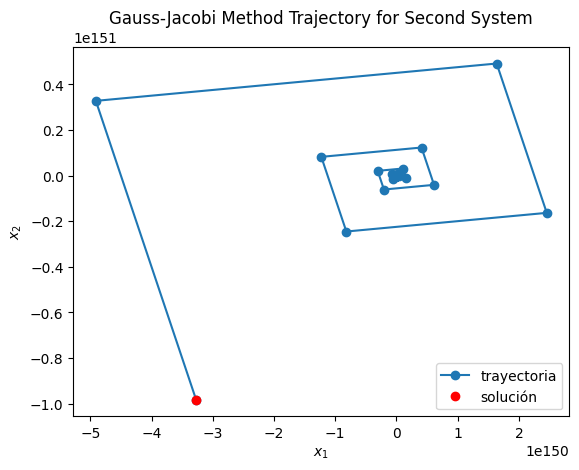

In [13]:
# Second system of equations
A2 = [[1, 1], [-2, 1]]
b2 = [6, 0]
x0 = [1, 1]

# Gauss-Jacobi for second system
iterations_jacobi2 = gauss_jacobi(A2, b2, x0, tol, max_iter)
x1_vals2 = [iter[0] for iter in iterations_jacobi2]
x2_vals2 = [iter[1] for iter in iterations_jacobi2]

plt.figure()
plt.plot(x1_vals2, x2_vals2, 'o-', label='trayectoria')
plt.plot(x1_vals2[-1], x2_vals2[-1], 'ro', label='solución')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Gauss-Jacobi Method Trajectory for Second System')
plt.show()


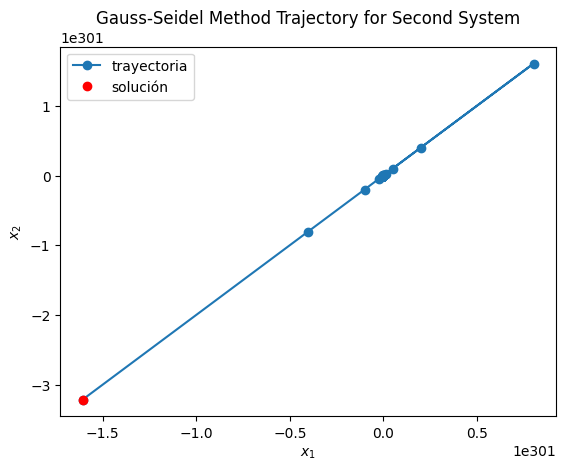

In [14]:
# Gauss-Seidel for second system
iterations_seidel2 = gauss_seidel(A2, b2, x0, tol, max_iter)
x1_vals_seidel2 = [iter[0] for iter in iterations_seidel2]
x2_vals_seidel2 = [iter[1] for iter in iterations_seidel2]

plt.figure()
plt.plot(x1_vals_seidel2, x2_vals_seidel2, 'o-', label='trayectoria')
plt.plot(x1_vals_seidel2[-1], x2_vals_seidel2[-1], 'ro', label='solución')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Gauss-Seidel Method Trajectory for Second System')
plt.show()
